In this notebook we create a dataframe with parameter sets that sample the parameter space. 

The distribution is a used is a loguniform distribution but the uniform is defined as well. The sampling method is latin hypercube sampling

##### Imports

In [1]:

import pickle
import pandas as pd
import numpy as np
from datetime import date
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


##### Distributions to sample from

In [2]:
#UNIFORM function returns a uniform distribution from 'low' to 'high' of a certain 'size'. 
def uniform(low=-3, high=3, size=None):
    return np.random.uniform(low, high, size)

#LOGUNIFORM function returns a loguniform distribution from 'low' to 'high' of a certain 'size'. 
#In the loguniform distribution, a positive random variable X is log-uniformly distributed if the logarithm of X is uniform distributed. 
#Also called the reciprocal distribution
def loguniform(low=-3, high=3, size=None): 
    return (10) ** (np.random.uniform(low, high, size))


##### Latin Hypercube Sampling algorithm

Latin-Hypercube is an efficient method of sampling to cover efficiently the parameter space by using a only a few samples.

To do this, we separate the space into x sections in every dimension. x is the number of samples desired. For a 2D space, we would obtain a Latin square where no samples can appear in the same column or row (for a 2D space). Such configuration is similar to having N rooks on a chess board without threatening each other. Latin hypercube sampling is a generalisation of this concept to an arbitrary number of dimensions. 

To generate the sectioning of the space, we need to provide an initial distribution in the form of a dataset. This can be done by providing the output of the uniform and loguniform functions. 

(Bergstra et al. 2012; Iman et al. 1980)


In [3]:
def lhs(data, nsample): #data contains the information on the distribution. nsample is the number of samples desired (x). 
    m, nvar = len(data),1
    ran = np.random.uniform(size=(nsample, nvar))
    s = np.zeros((nsample, nvar))
    for j in range(0, nvar):
        idx = np.random.permutation(nsample) + 1
        P = ((idx - ran[:, j]) / nsample) * 100
        s[:, j] = np.percentile(data[:, j], P)
    return s





##### Function that creates dataframe



In [4]:
def parameterfile_creator_function(n_param_sets): #number of parameter sets desired in the df (number of rows)
    #First, an example distribution is created (loguniform or uniform).
    loguniformdist = loguniform(size=1000000) 
    
    #Parameters and their possible ranges
    parameters_lhs = ['c1','c2','c3']
    c1_range = (0.1, 10) 
    c2_range = (1, 100)
    c3_range = (1, 100)
    parameter_range_list = [c1_range,c2_range, c3_range]

    
    #Defining distributions to input into lhs function
    

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    #1. Adapt distribution to parameter rangeparameter_distribution_list = []
    parameter_distribution_list = []
    for parameter_range in parameter_range_list: 
        distribution = [x for x in loguniformdist if parameter_range[0] <= x <= parameter_range[1]]
        parameter_distribution_list.append(distribution)
        
    #2. Adapt distributions so they are all of the same lenght
    minimumlenghtdistribution = np.amin([len(x) for x in parameter_distribution_list])
    for count,parameter_distribution in enumerate(parameter_distribution_list):
        globals()[f'{parameters_lhs[count]}_distribution'] =  np.column_stack( (parameter_distribution[:minimumlenghtdistribution])).transpose()


    #Sample using LHS
    c1 = lhs(c1_distribution,n_param_sets)
    c2 = lhs(c2_distribution,n_param_sets)
    c3 = lhs(c3_distribution,n_param_sets)


    #Define constants 
    #1 is the number of columns (if two constants, that would be a 2). 
    #1000 is the value of the constant
    c4 = np.full((n_param_sets, 1), 1000) 
 
    #Define index column to identify parameter sets. 
    index = np.arange(1, n_param_sets + 1, dtype=np.int).reshape(n_param_sets, 1)
    
    #Define dataframe column names. Then concatenate LHS results and constants.
    parameternames = ['index','c1','c2','c3','c4']
    points = np.concatenate((index,c1,c2,c3, c4), 1)
    df = pd.DataFrame(data=points, columns=parameternames)
    df['index'] = df['index'].astype(int)
    df = df.set_index('index')

    return df #number of columns is the number of parameters. number of rows is the number of parameter sets / samples

##### Execute code and functions



Create dataframe and save it as pickle file

In [8]:
n_param_sets = 100 
df = parameterfile_creator_function(n_param_sets)
pickle.dump(df, open('df.pkl', 'wb'))


Print dataframe

In [9]:
df

c1         c2         c3      c4
index                                        
1      0.445587  41.650574  48.361761  1000.0
2      0.667728  48.226396  26.241564  1000.0
3      0.152564   1.311921   1.346937  1000.0
4      0.284476   1.628657  91.579369  1000.0
5      3.033083  10.815844  33.478198  1000.0
...         ...        ...        ...     ...
96     1.276455   4.686500  22.118476  1000.0
97     0.913298   1.846728  10.193874  1000.0
98     0.228304   8.326357  52.468905  1000.0
99     0.106351  65.038189   1.609536  1000.0
100    2.008183  60.901176  28.425494  1000.0

[100 rows x 4 columns]

Plot to see that df is correct

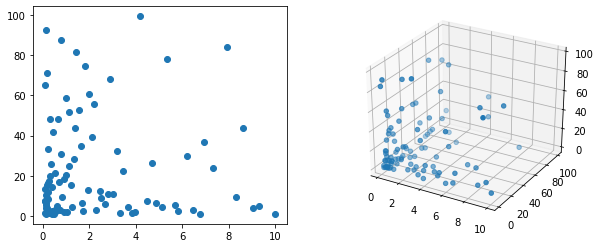

In [10]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(122, projection='3d')

ax.scatter(df['c1'],df['c2'], df['c3'])

ax3 = fig.add_subplot(121)

plt.scatter(df['c1'], df['c2'])
plt.show()